PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [18]:

from pandas import read_csv
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
forest=pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
forest.shape

(517, 31)

In [6]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
forest.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [11]:
forest['FFMC']=forest['FFMC'].astype('int')
forest['DMC']=forest['DMC'].astype('int')
forest['DC']=forest['DC'].astype('int')
forest['ISI']=forest['ISI'].astype('int')
forest['temp']=forest['temp'].astype('int')
forest['wind']=forest['wind'].astype('int')
forest['rain']=forest['rain'].astype('int')
forest['area']=forest['area'].astype('int')

In [13]:
forest.corr()

<ipython-input-13-ce242a44f317>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  forest.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.381275,0.327776,0.535730,0.427536,-0.297030,-0.013404,0.046998,0.038401,0.023703,...,-0.136327,-0.281958,-0.453831,0.029444,-0.036507,-0.074891,-0.036238,-0.089382,-0.010775,0.074152
DMC,0.381275,1.000000,0.682180,0.313325,0.465960,0.073746,-0.098537,0.060602,0.072799,-0.011606,...,-0.176289,-0.317737,-0.105566,-0.001830,-0.050350,-0.407581,-0.081726,-0.073887,-0.188097,0.111352
DC,0.327776,0.682180,1.000000,0.233980,0.491729,-0.039150,-0.197614,0.031654,0.049063,-0.004237,...,-0.105703,-0.399160,-0.115024,-0.100983,-0.186137,-0.650486,-0.114270,-0.078414,0.093188,0.531855
ISI,0.535730,0.313325,0.233980,1.000000,0.399387,-0.132676,0.101231,0.055044,0.004933,0.047662,...,-0.163339,-0.252760,-0.103769,0.020547,0.115778,-0.144856,-0.062826,-0.073304,-0.073320,-0.063649
temp,0.427536,0.465960,0.491729,0.399387,1.000000,-0.525514,-0.216514,0.069908,0.099051,-0.070744,...,-0.328796,-0.321005,-0.144375,0.145014,0.055992,-0.338032,-0.042155,-0.056383,-0.054255,0.084446
RH,-0.297030,0.073746,-0.039150,-0.132676,-0.525514,1.000000,0.057676,0.073512,-0.075330,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.013404,-0.098537,-0.197614,0.101231,-0.216514,0.057676,1.000000,0.037974,0.015736,0.118117,...,0.263401,-0.023128,-0.071378,-0.043917,0.009240,0.175784,0.015370,0.010857,-0.053617,-0.173293
rain,0.046998,0.060602,0.031654,0.055044,0.069908,0.073512,0.037974,1.000000,-0.004364,-0.006079,...,-0.007609,-0.011468,-0.003563,-0.014685,-0.010541,-0.019524,-0.003563,-0.002517,-0.009882,-0.040366
area,0.038401,0.072799,0.049063,0.004933,0.099051,-0.075330,0.015736,-0.004364,1.000000,-0.052812,...,0.000373,-0.020680,-0.012358,0.006167,-0.020178,-0.045329,0.006278,-0.008730,-0.016686,0.056463
dayfri,0.023703,-0.011606,-0.004237,0.047662,-0.070744,0.064506,0.118117,-0.006079,-0.052812,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
forest['month']=label_encoder.fit_transform(forest['month'])
forest['day']=label_encoder.fit_transform(forest['day'])
forest['size_category']=label_encoder.fit_transform(forest['size_category'])

In [15]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86,26,94,5,8,51,6,0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90,35,669,6,18,33,0,0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90,43,686,6,14,33,1,0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91,33,77,9,8,97,4,0,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89,51,102,9,11,99,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81,56,665,1,27,32,2,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81,56,665,1,21,71,5,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81,56,665,1,21,70,6,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94,146,614,11,25,42,4,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   month          517 non-null    int64
 1   day            517 non-null    int64
 2   FFMC           517 non-null    int64
 3   DMC            517 non-null    int64
 4   DC             517 non-null    int64
 5   ISI            517 non-null    int64
 6   temp           517 non-null    int64
 7   RH             517 non-null    int64
 8   wind           517 non-null    int64
 9   rain           517 non-null    int64
 10  area           517 non-null    int64
 11  dayfri         517 non-null    int64
 12  daymon         517 non-null    int64
 13  daysat         517 non-null    int64
 14  daysun         517 non-null    int64
 15  daythu         517 non-null    int64
 16  daytue         517 non-null    int64
 17  daywed         517 non-null    int64
 18  monthapr       517 non-null    int64
 19  monthaug

<Axes: >

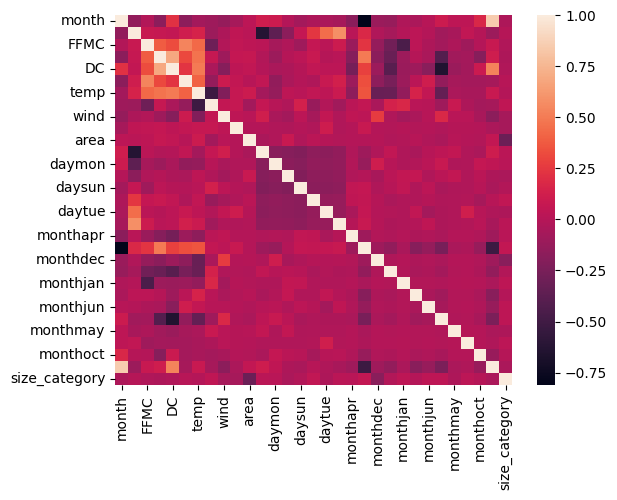

In [19]:
sns.heatmap(forest.corr())

In [21]:
x=forest.iloc[:,0:11]
y=forest.iloc[:,-1]

In [22]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86,26,94,5,8,51,6,0,0
1,10,5,90,35,669,6,18,33,0,0,0
2,10,2,90,43,686,6,14,33,1,0,0
3,7,0,91,33,77,9,8,97,4,0,0
4,7,3,89,51,102,9,11,99,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81,56,665,1,27,32,2,0,6
513,1,3,81,56,665,1,21,71,5,0,54
514,1,3,81,56,665,1,21,70,6,0,11
515,1,2,94,146,614,11,25,42,4,0,0


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [25]:
# Standardization
a = StandardScaler()
a.fit(x)
x_standardized = a.transform(x)

In [26]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,7.833837e-16,-1.099486e-16,1.511793e-16,-1.546152e-17,1.099486e-16,2.198972e-16,-1.030768e-17,2.405125e-17,2.405125e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-1.307801e+01,-1.709610e+00,-2.180631e+00,-1.884152e+00,-2.834742e+00,-1.796637e+00,-1.980591e+00,-5.716911e-02,-1.983119e-01
25%,-1.089076,-9.031536e-01,-3.818346e-02,-6.634271e-01,-4.458369e-01,-5.701592e-01,-5.901260e-01,-6.924563e-01,-8.669798e-01,-5.716911e-02,-1.983119e-01
50%,0.055339,1.367805e-01,1.429253e-01,-3.884036e-02,4.699731e-01,-1.321617e-01,1.005251e-01,-1.403660e-01,2.466315e-01,-5.716911e-02,-1.983119e-01
75%,1.199754,6.567476e-01,3.240340e-01,4.920584e-01,6.676590e-01,3.058358e-01,6.185135e-01,5.344111e-01,2.466315e-01,-5.716911e-02,-1.038748e-01
max,1.199754,1.696682e+00,1.048469e+00,2.818644e+00,1.260717e+00,1.037978e+01,2.517804e+00,3.417549e+00,3.030660e+00,2.211015e+01,1.695777e+01


In [46]:
model=Sequential()
model.add(Dense(14, input_dim=11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
history = model.fit(x,y,epochs=250,validation_split=0.33, batch_size=10)
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/250
35/35 [==============================] - 2s 15ms/step - loss: 11.7327 - accuracy: 0.6676 - val_loss: 3.9510 - val_accuracy: 0.6374
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: 3.2690 - accuracy: 0.5694 - val_loss: 3.5215 - val_accuracy: 0.4912
Epoch 3/250
35/35 [==============================] - 0s 5ms/step - loss: 1.7538 - accuracy: 0.5983 - val_loss: 3.8087 - val_accuracy: 0.4503
Epoch 4/250
35/35 [==============================] - 0s 4ms/step - loss: 1.1798 - accuracy: 0.6908 - val_loss: 1.5770 - val_accuracy: 0.6082
Epoch 5/250
35/35 [==============================] - 0s 3ms/step - loss: 0.8350 - accuracy: 0.7370 - val_loss: 0.9547 - val_accuracy: 0.6959
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.7601 - val_loss: 0.9853 - val_accuracy: 0.7251
Epoch 7/250
35/35 [==============================] - 0s 4ms/step - loss: 0.6130 - accuracy: 0.7428 - val_loss: 0.9930 - val_accuracy: 0.7427
Epoch 8/250

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
scores

[0.03721011430025101, 0.9864603281021118]

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

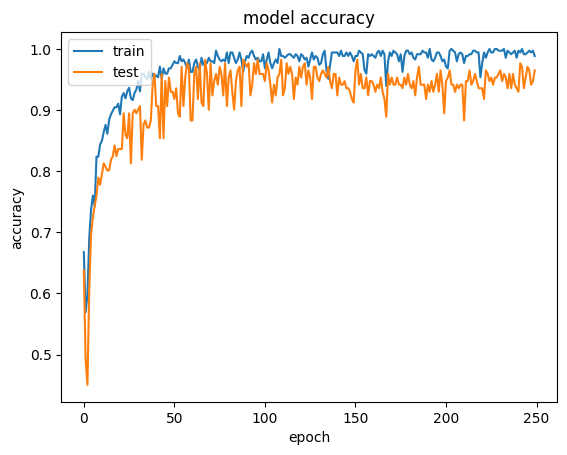

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

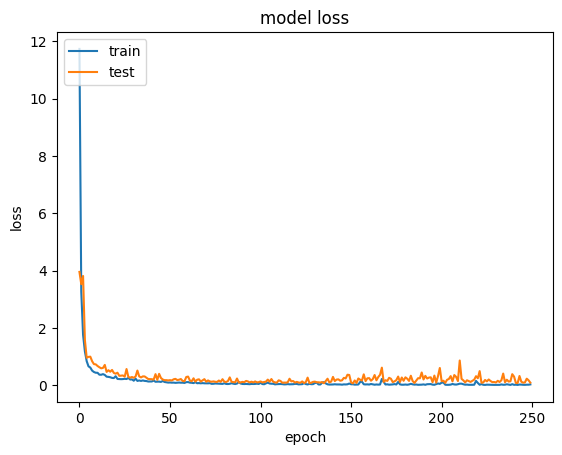

In [54]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()